<ipython-input-2-83667edffbcc>:10: DtypeWarning: Columns (195,201) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("surveyDataSience.csv", skiprows=2)


   YearsOfStudy  YearsOfStudy_Norm  YearsCoding  YearsCoding_Norm
0           NaN                  0         25.0              1.00
1           NaN                  0          2.0              0.08
2           8.0                  0         25.0              1.00
3           8.0                  0          0.5              0.02
4           NaN                  0          0.5              0.02


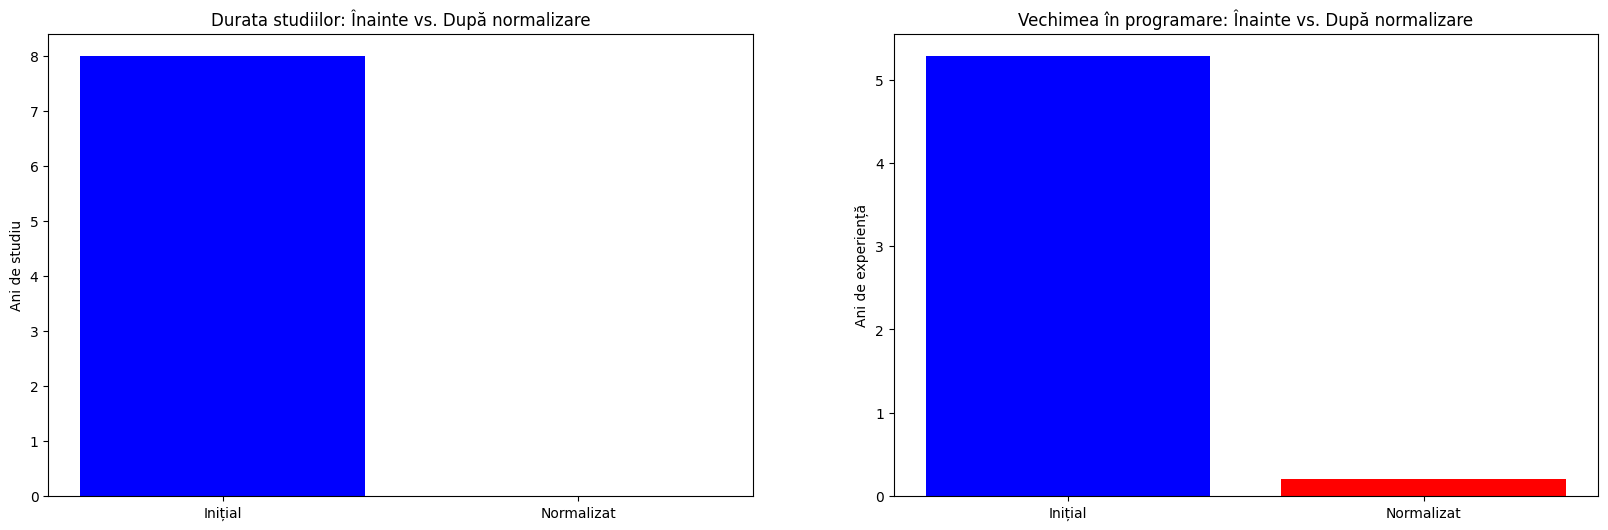

In [2]:
#a)problema 1 -  durata anilor de studii universitare, vechimea in programare

import pandas as pd
import csv
from google.colab import files
import matplotlib.pyplot as plt

#upload =files.upload()
data_headers = pd.read_csv("surveyDataSience.csv", nrows=1)
data = pd.read_csv("surveyDataSience.csv", skiprows=2)
data.columns=data_headers.columns

# anii de studiu
licenta = 3
master = 2
doctorat = 3

studies_map = {
    "Bachelor's degree": licenta,
    "Master's degree": licenta + master,
    "Doctoral degree": licenta + master + doctorat
}

# Crearea unei noi coloane cu durata în ani
data["YearsOfStudy"] = data["Q4"].map(studies_map)

# Normalizare Min-Max pentru durata studiilor
min_years_study = data["YearsOfStudy"].min()
max_years_study = data["YearsOfStudy"].max()
if min_years_study != max_years_study:
    data["YearsOfStudy_Norm"] = (data["YearsOfStudy"] - min_years_study) / (max_years_study - min_years_study)
else:
    data["YearsOfStudy_Norm"] = 0


# vechime
experience_map = {
    "I have never written code" : 0,
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25
}

data["YearsCoding"] = data["Q6"].map(experience_map)

# Normalizare Min-Max pentru vechimea în programare
min_years_coding = data["YearsCoding"].min()
max_years_coding = data["YearsCoding"].max()
if min_years_coding != max_years_coding:
    data["YearsCoding_Norm"] = (data["YearsCoding"] - min_years_coding) / (max_years_coding - min_years_coding)
else:
    data["YearsCoding_Norm"] = 0

print(data[["YearsOfStudy", "YearsOfStudy_Norm", "YearsCoding", "YearsCoding_Norm"]].head())

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Grafic pentru durată studii (înainte și după normalizare)
axs[0].bar(["Inițial", "Normalizat"], [data["YearsOfStudy"].mean(), data["YearsOfStudy_Norm"].mean()], color=['blue', 'red'])
axs[0].set_title("Durata studiilor: Înainte vs. După normalizare")
axs[0].set_ylabel("Ani de studiu")

# Grafic pentru vechimea în programare (înainte și după normalizare)
axs[1].bar(["Inițial", "Normalizat"], [data["YearsCoding"].mean(), data["YearsCoding_Norm"].mean()], color=['blue', 'red'])
axs[1].set_title("Vechimea în programare: Înainte vs. După normalizare")
axs[1].set_ylabel("Ani de experiență")

plt.show()

Saving Karpaty.jpg to Karpaty (1).jpg


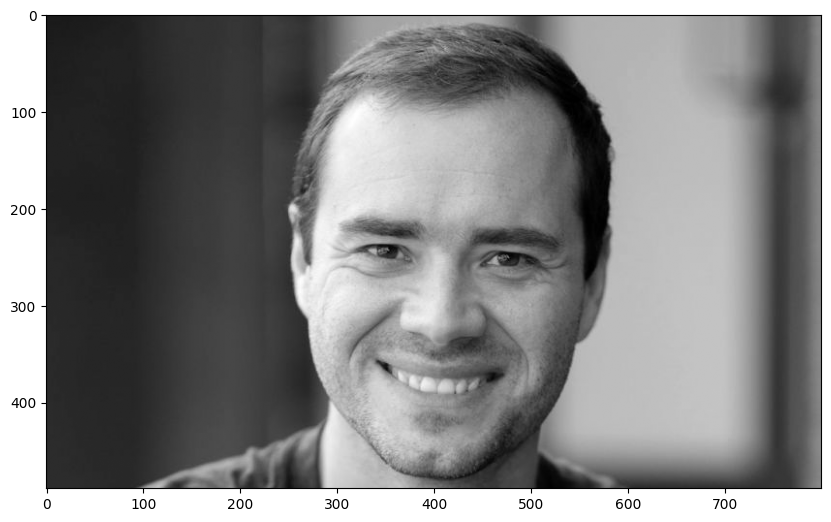

391200


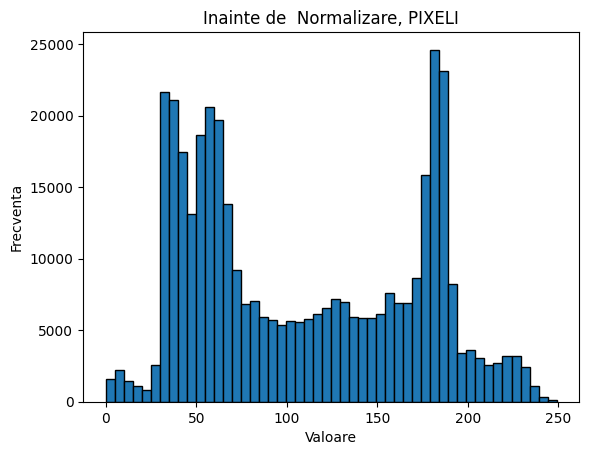

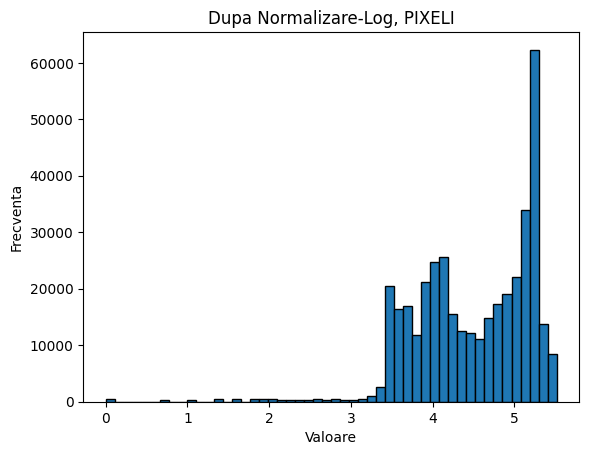

In [ ]:
#b)problema 2 - valorile pixelilor din imagini
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

img6 = Image.open('Karpaty.jpg')
fig, axs = plt.subplots(1, 1, figsize=(10, 9))
imgGri6 = img6.convert('L')
axs.imshow(imgGri6,cmap='gray') #nu arata chiar asa, dar ii face ceva plot-ul
#imgGri6.show() #-> ca sa se vada mai bine acel gri :)
plt.show()

from math import log, sqrt

# Obținerea valorilor pixelilor
valori_pixeli = []

if imgGri6 is not None:
    pixel_access = imgGri6.load()
    width, height = imgGri6.size

    for y in range(height):
        for x in range(width):
            pixel_value = pixel_access[x, y]
            valori_pixeli.append(pixel_value)
else:
    print("Imaginea nu a fost încărcată corect.")

print(len(valori_pixeli))

# Histograma inițială
plt.hist(valori_pixeli, bins = 50,edgecolor='black')
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Inainte de  Normalizare, PIXELI')
plt.show()

# -1 1 sau 0 1
# in 0-1 /255
valori_pixeli_log = []
for s in valori_pixeli:
    if s > 0:
        valori_pixeli_log.append(log(s))
    else:
        valori_pixeli_log.append(0)

plt.hist(valori_pixeli_log, bins = 50,edgecolor='black')
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Dupa Normalizare-Log, PIXELI')
plt.show()

#pentru afisarea imaginii dupa normalizare :)
import numpy as np
output_image = Image.fromarray(np.uint8(valori_pixeli_log))
output_image.show()

Saving texts.txt to texts.txt
Mesaj de informare: 
Cursul și laboratoarele de Inteligență Artificială vor fi o 
provocare pentru toți. Suntem convinși că veți realiza proiecte 
foarte interesante. Vă încurajăm să adresați întrebări atunci 
când ceva nu e clar, atât în mod live, cât și folosind platforma 
Teams, canalul ”general”. 
Dacă ați citit până aici, vă rugăm să lăsați un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm că am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimați cursanți,
Suntem încântați să vă avem în echipa noastră pentru Cursul și 
laboratoarele de Inteligență Artificială. Această experiență va 
fi o adevărată provocare, dar suntem convinși că veți realiza 
proiecte extrem de interesante.
Vă încurajăm să fiți activi și să adresați întrebări atunci când 
ceva nu este clar. Fie că este vorba de o discuție în timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici să vă sprij

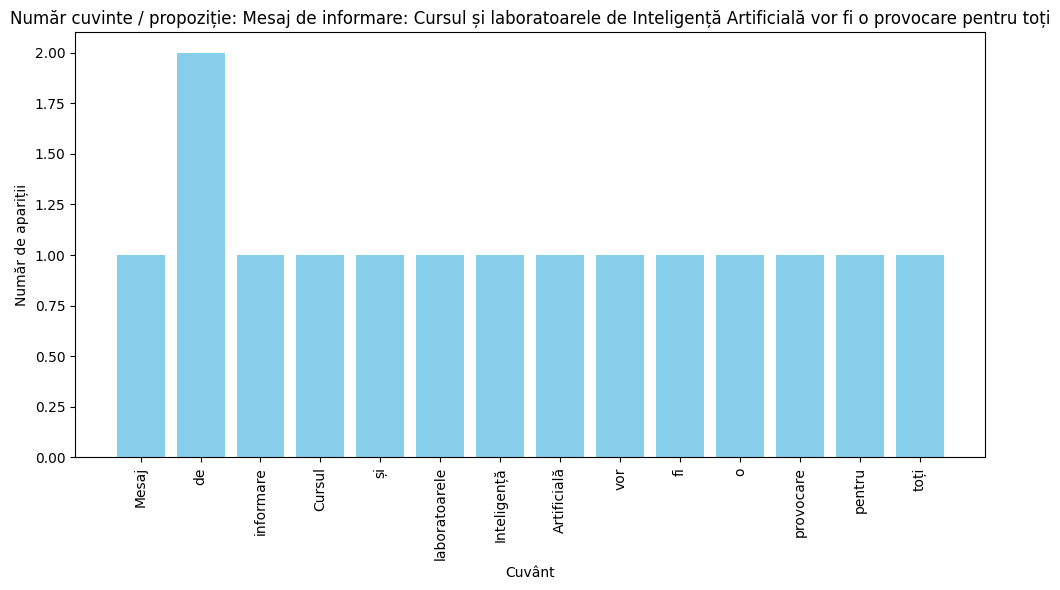

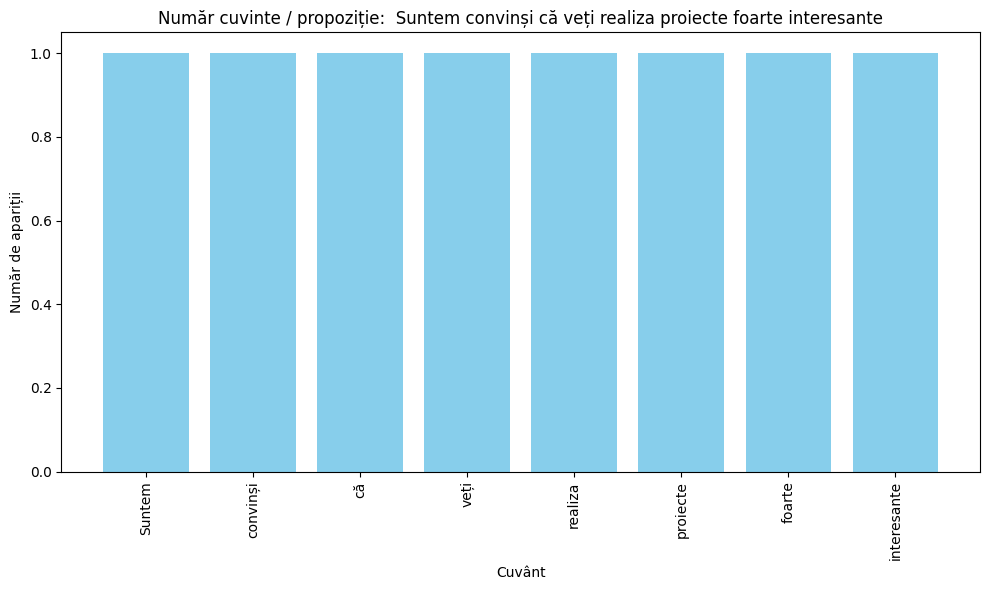

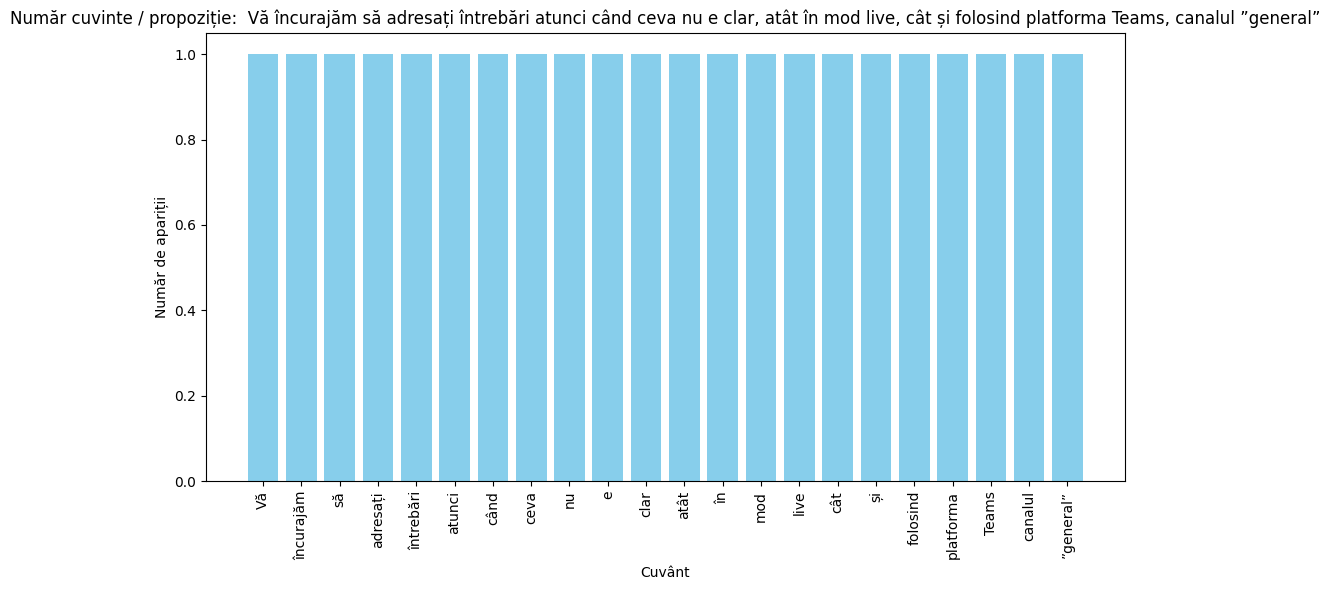

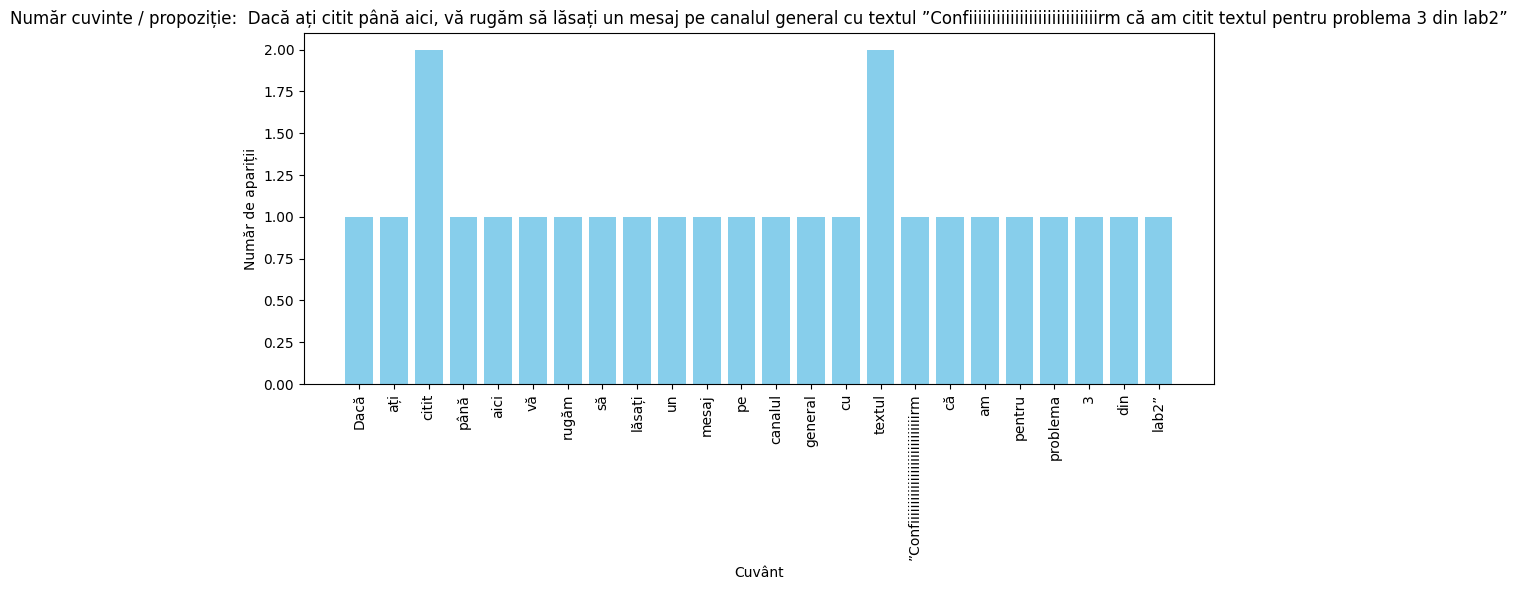

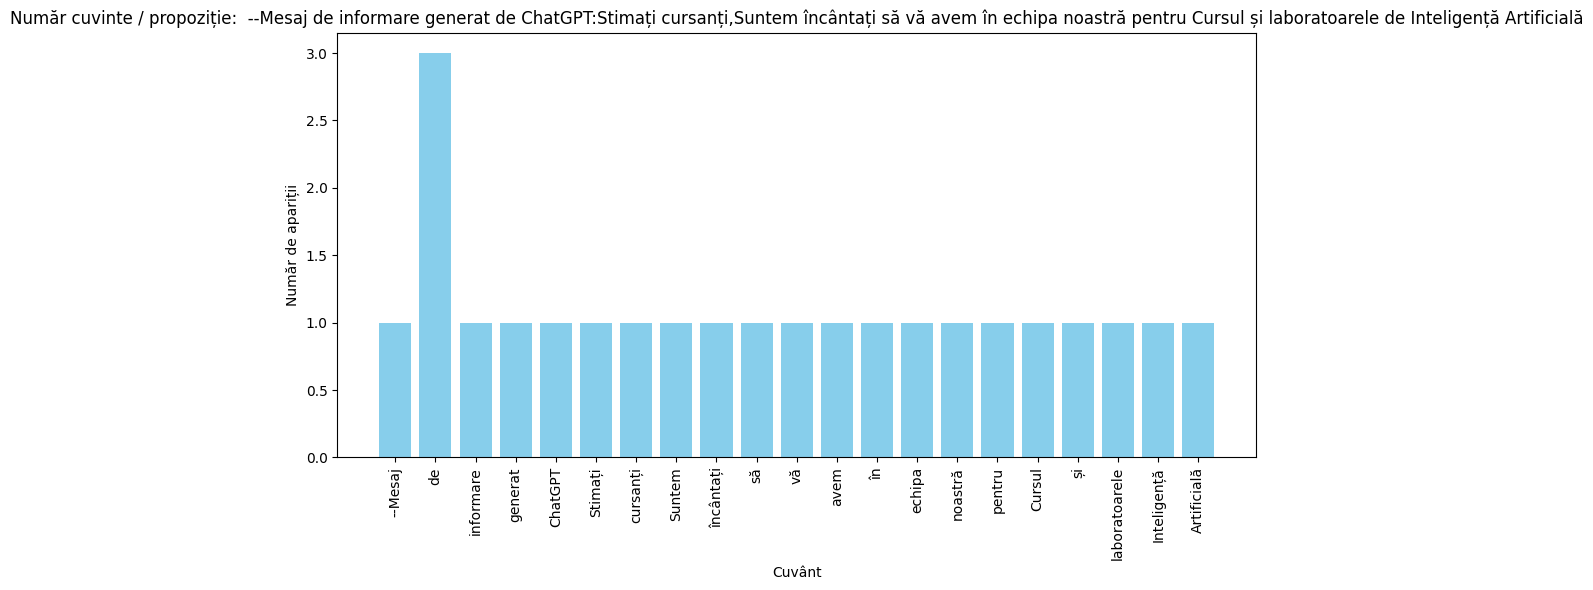

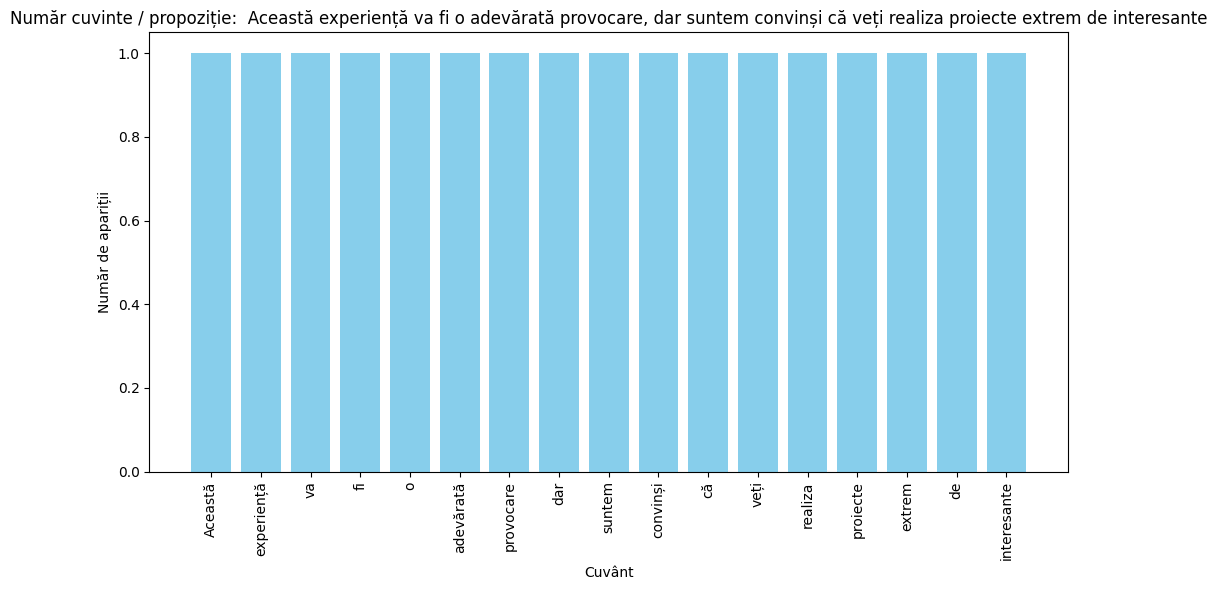

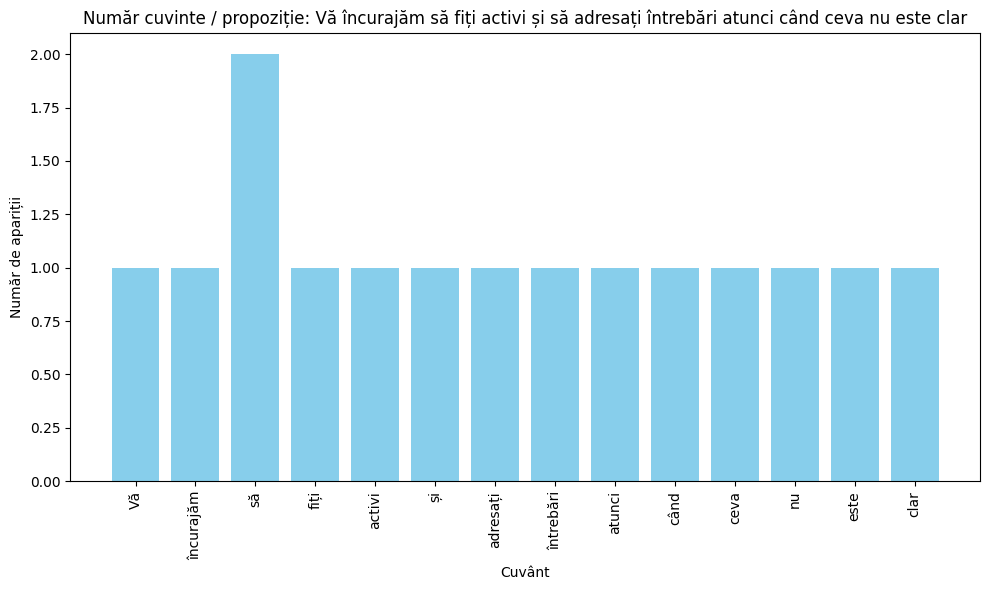

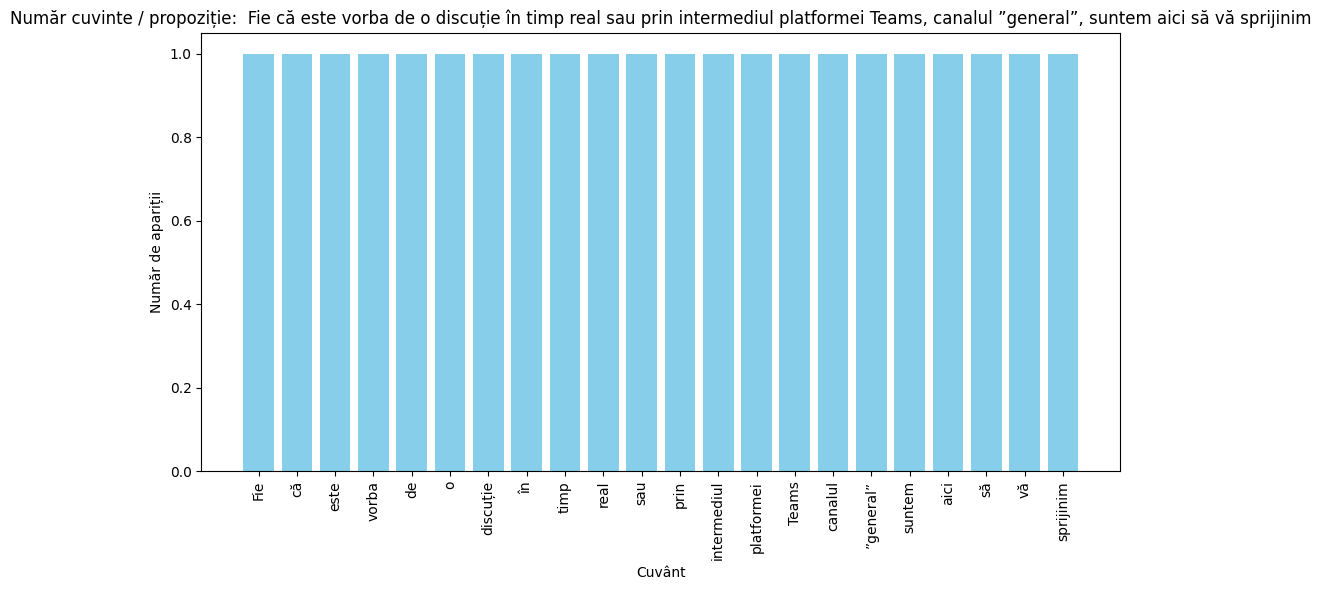

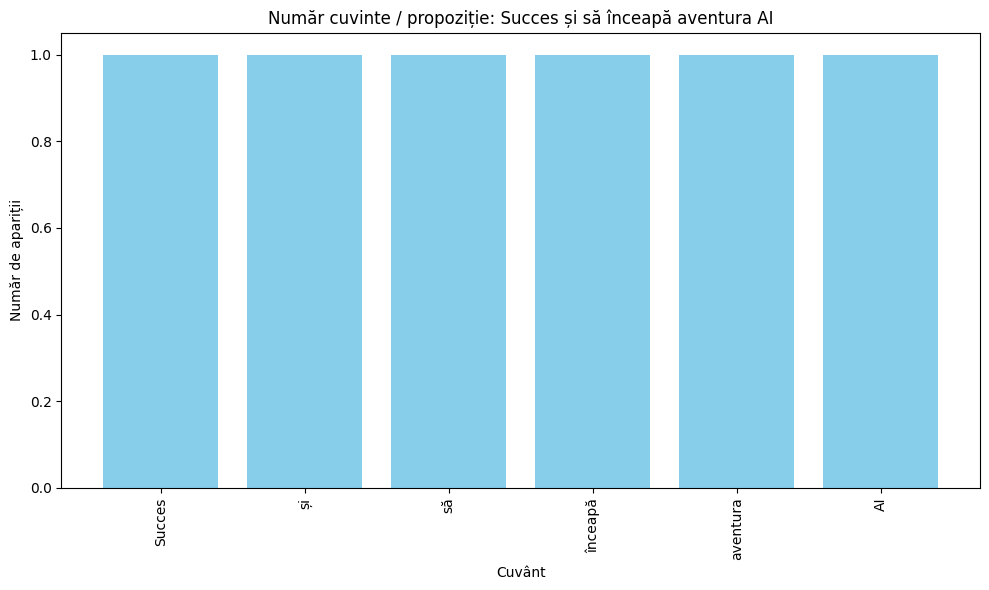

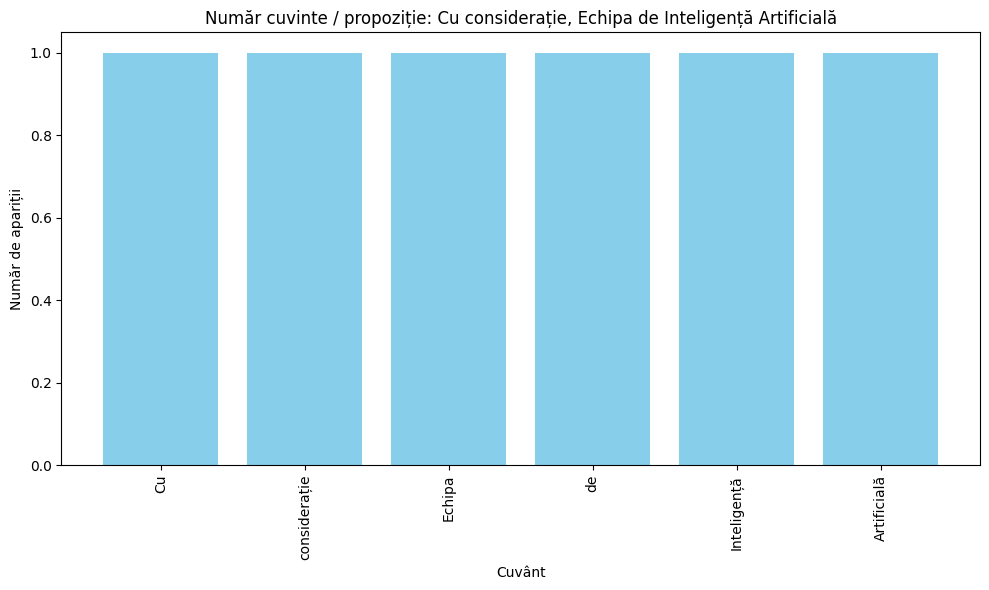

{'vor', 'Cursul', 'Artificială', 'fi', 'informare', 'pentru', 'provocare', 'Mesaj', 'o', 'laboratoarele', 'toți', 'și', 'Inteligență', 'de'}
{'veți', 'convinși', 'proiecte', 'Suntem', 'realiza', 'interesante', 'că', 'foarte'}
{'nu', '”general”', 'folosind', 'e', 'să', 'când', 'clar', 'ceva', 'în', 'încurajăm', 'cât', 'platforma', 'canalul', 'întrebări', 'adresați', 'Vă', 'mod', 'Teams', 'atunci', 'live', 'și', 'atât'}
{'lăsați', 'până', 'să', 'textul', 'că', 'lab2”', 'Dacă', 'citit', 'cu', 'vă', 'pe', 'canalul', 'problema', 'rugăm', '”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm', 'am', 'mesaj', 'general', 'aici', 'pentru', '3', 'un', 'ați', 'din'}
{'Cursul', '--Mesaj', 'să', 'echipa', 'laboratoarele', 'de', 'în', 'Artificială', 'Suntem', 'cursanți', 'ChatGPT', 'vă', 'generat', 'informare', 'avem', 'Stimați', 'Inteligență', 'încântați', 'noastră', 'pentru', 'și'}
{'experiență', 'extrem', 'Această', 'convinși', 'fi', 'dar', 'că', 'veți', 'proiecte', 'provocare', 'realiza', 'interesante', 'va', 'o

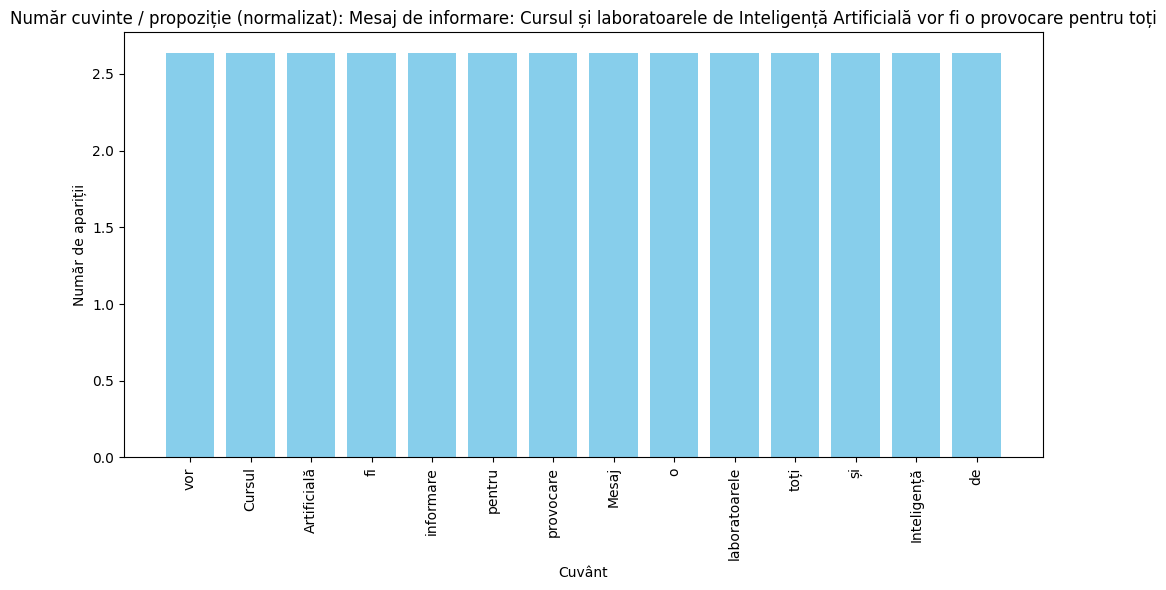

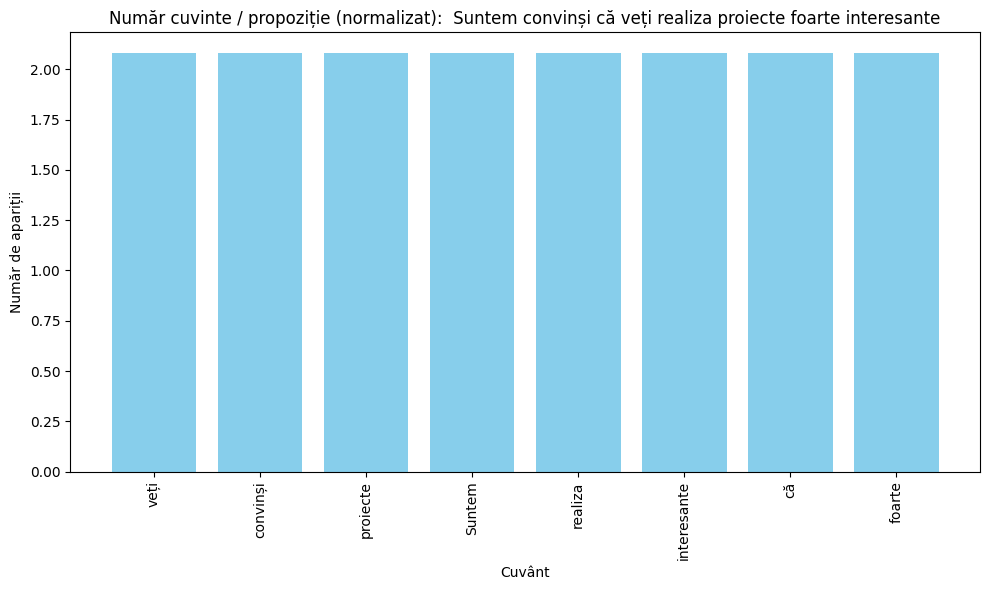

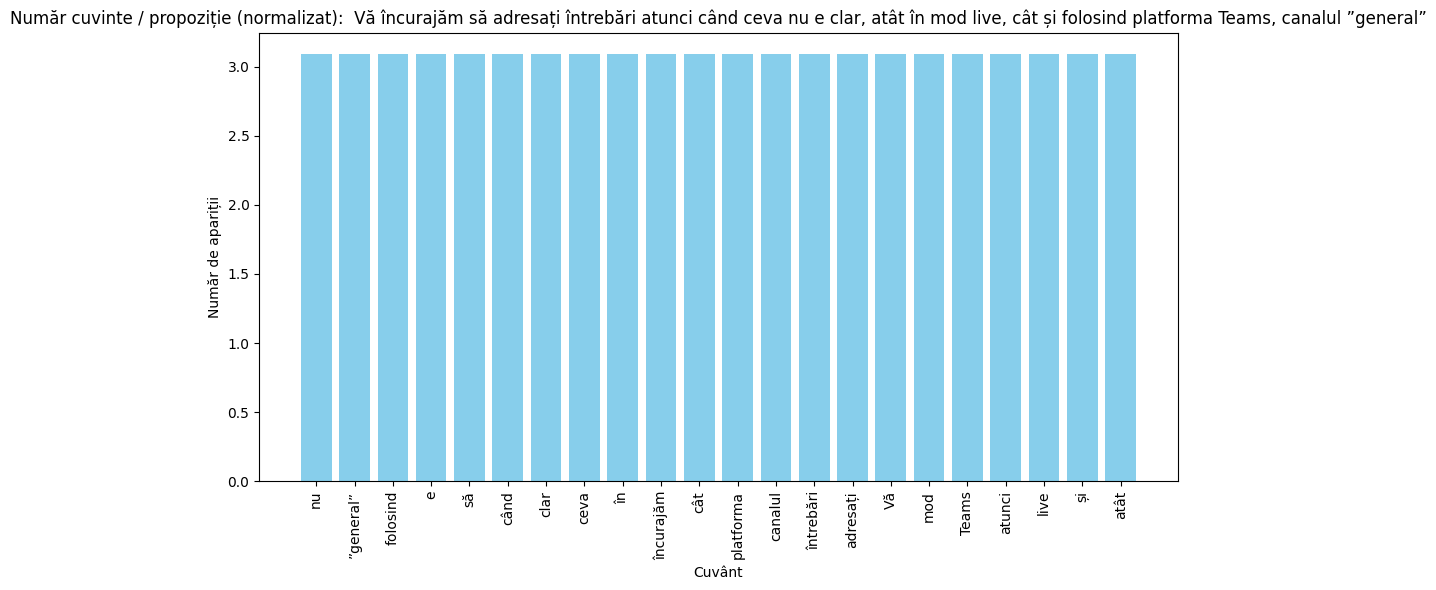

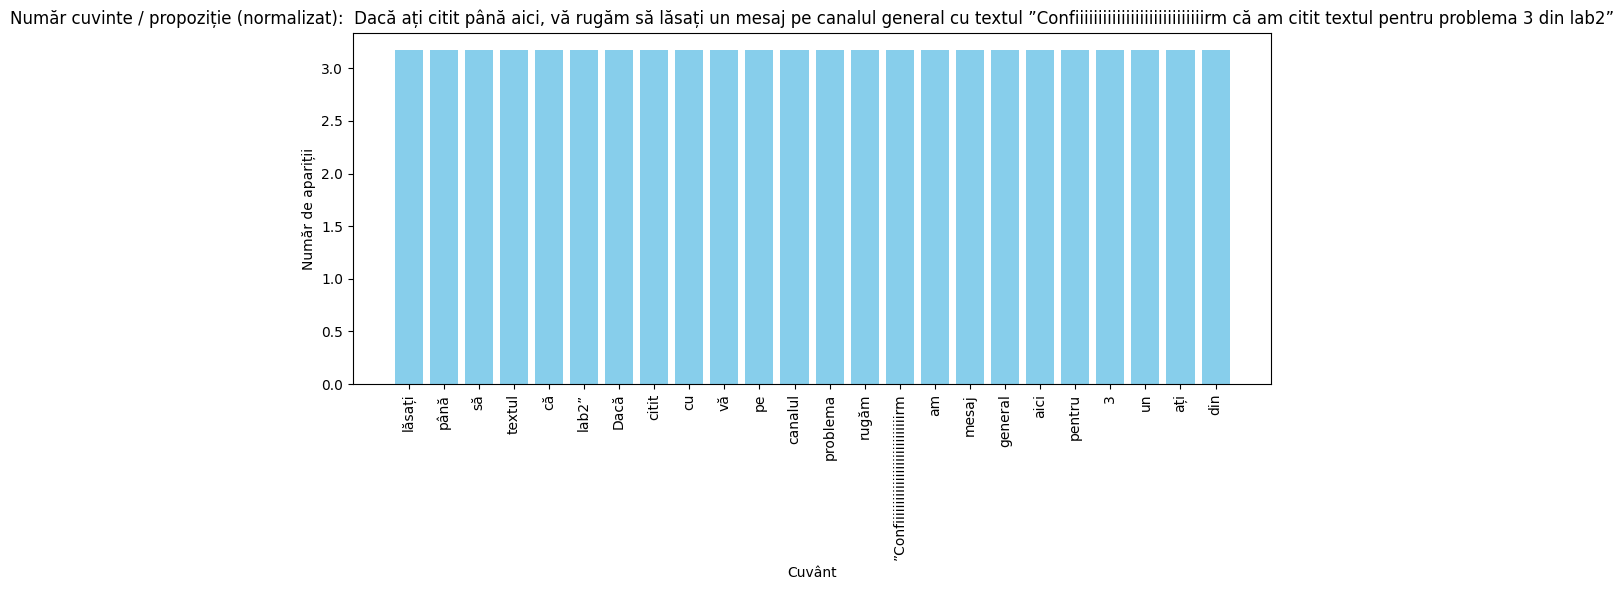

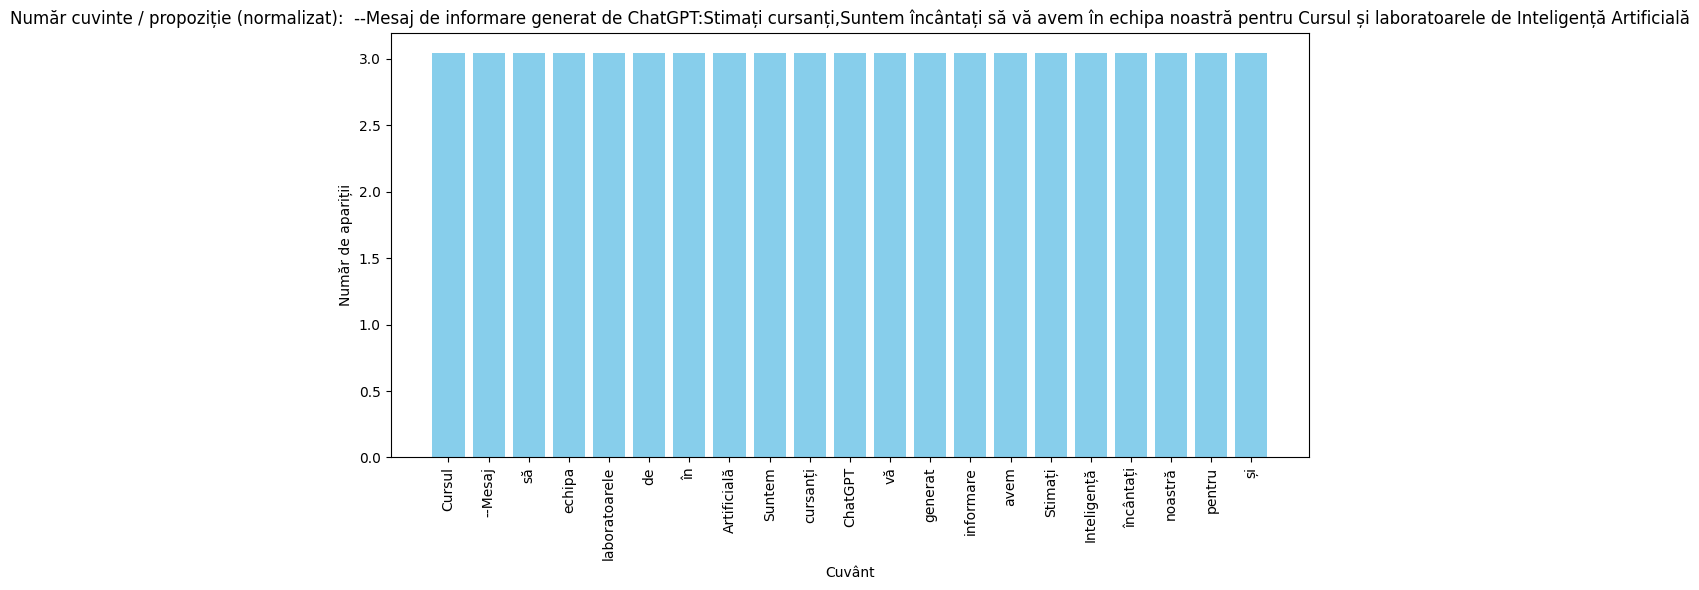

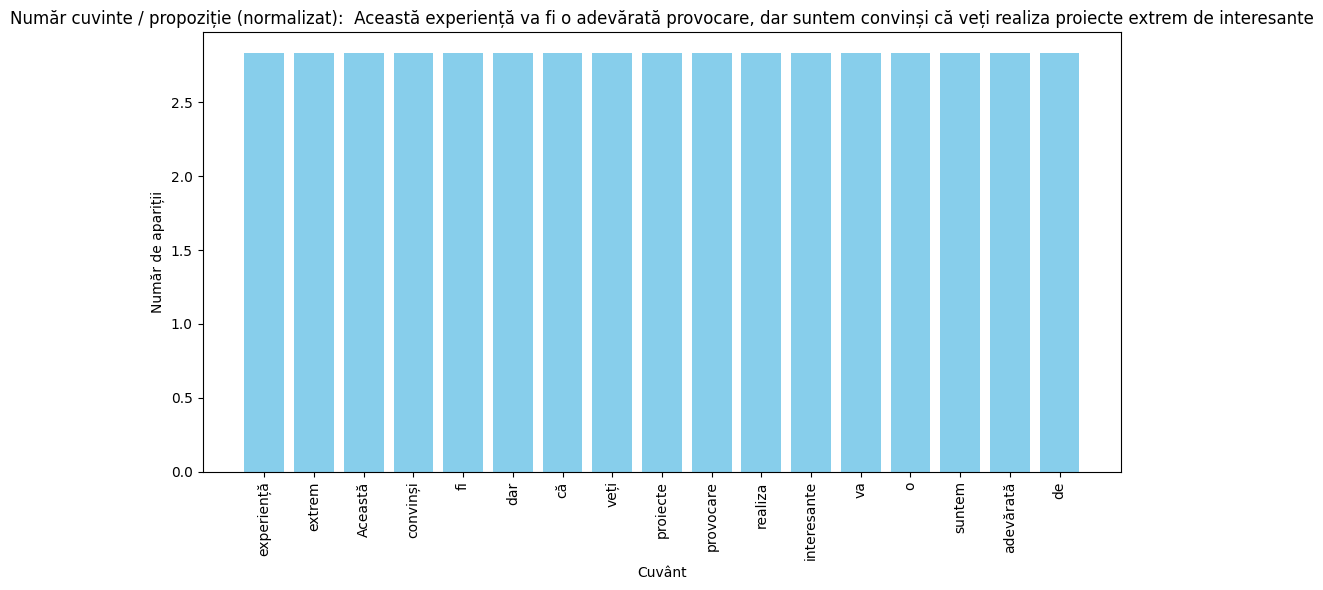

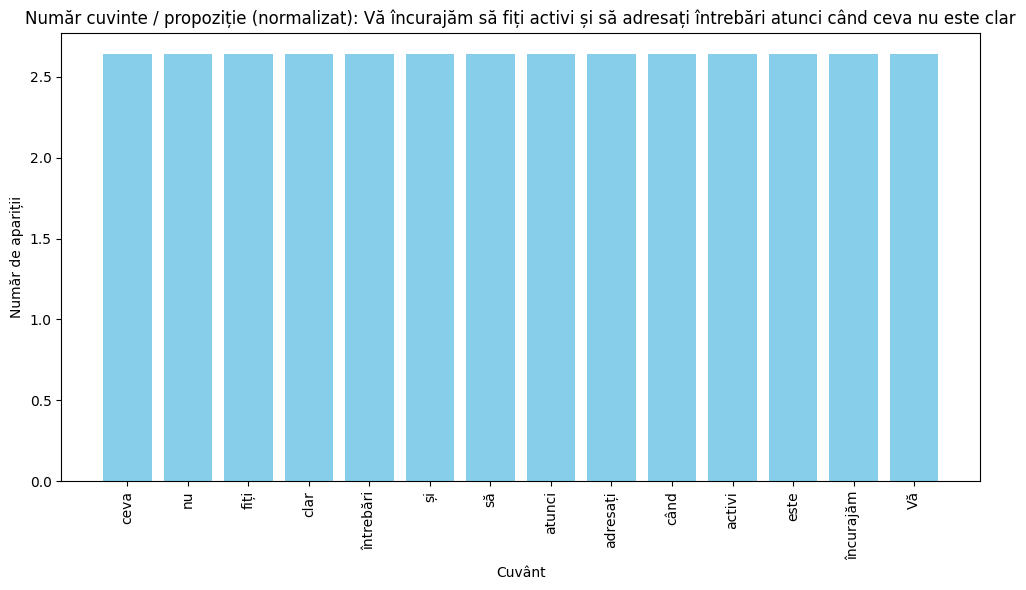

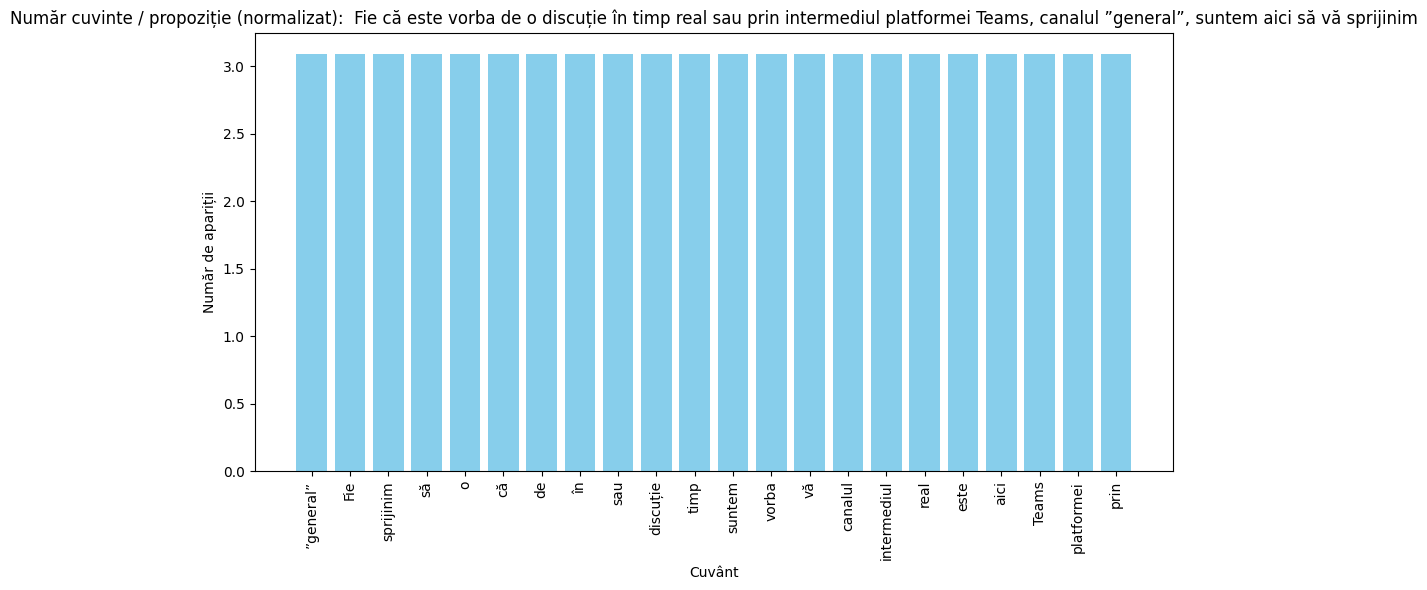

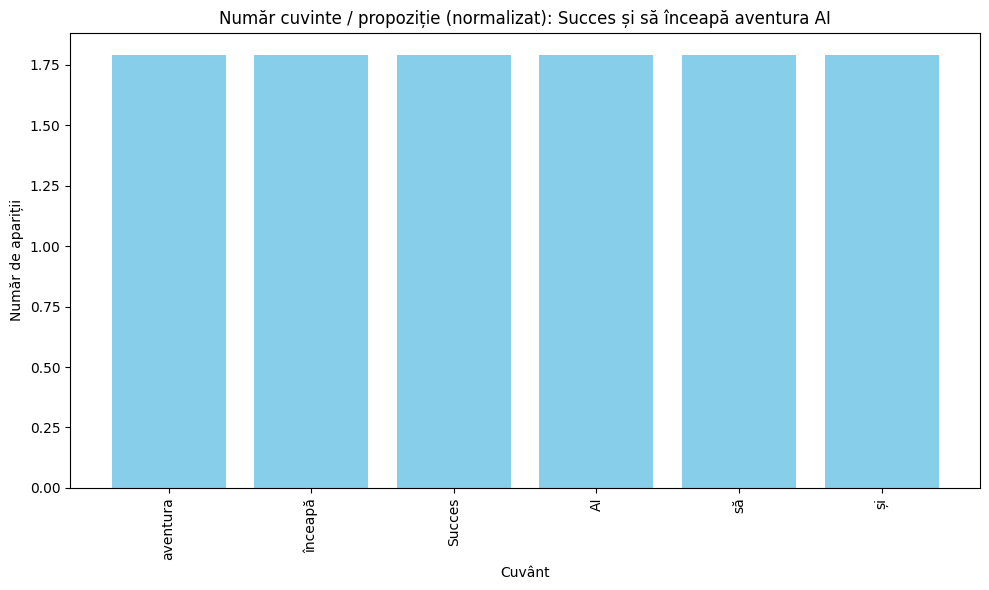

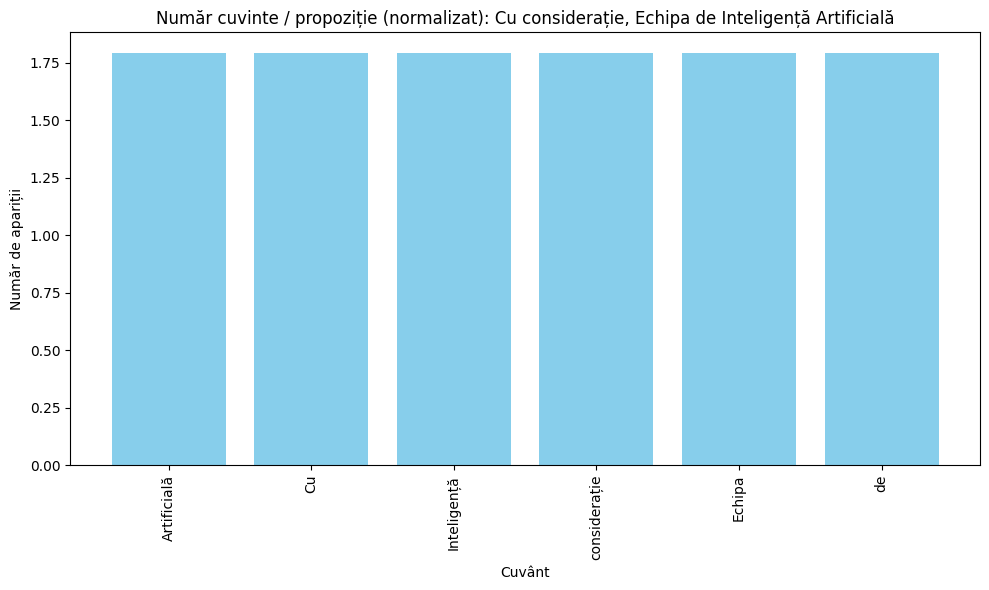

In [ ]:
#c)problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.
import re
import matplotlib.pyplot as plt
from collections import defaultdict

from google.colab import files
uploaded = files.upload()

file_path = 'texts.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    fisier = file.read()
print(fisier)

#extrag propozitiile
text_fara_newline = fisier.replace("\n", "")
punctuatii = re.compile(r'[.!?]')
propozitii = punctuatii.split(text_fara_newline)

#print(len(propozitii))
#print(propozitii)

#nr cuvinte
separatori = re.compile(r'[, .!?:"]')
cuvinte = separatori.split(text_fara_newline)
rezultat = []
for c in cuvinte:
    if c != "":
        rezultat.append(c)

# print(len(rezultat))
# print(rezultat)

#dict pt stocare cuv
impartire = defaultdict(list)
aparitii_cuvinte = defaultdict(int)
for prop in propozitii:
    cuv = separatori.split(prop)
    cuv_final = []
    for c in cuv:
        if c != "":
            cuv_final.append(c)
    for c in cuv_final:
        aparitii_cuvinte[(prop, c)] += 1
        impartire[prop].append(c)
    cuv_final.clear()

# print(impartire)
# cuvinte = list(aparitii_cuvinte.keys())
# numar_aparitii = list(aparitii_cuvinte.values())

# Vizualizare histograme pentru fiecare propoziție cu frecvențele cuvintelor
for propozitie, cuvinte in impartire.items():
    cuvinte_propozitie = list(cuvinte)
    numar_aparitii = [aparitii_cuvinte[(propozitie, cuvant)] for cuvant in cuvinte_propozitie]

    # Desenăm histograma pentru propoziția curentă
    plt.figure(figsize=(10, 6))
    plt.bar(cuvinte_propozitie, numar_aparitii, color='skyblue')
    plt.xlabel('Cuvânt')
    plt.ylabel('Număr de apariții')
    plt.title(f'Număr cuvinte / propoziție: {propozitie}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# Normalizarea aparițiilor cuvintelor
for propozitie, cuvinte in impartire.items():
    cuvinte_propozitie_unice = set(cuvinte)

    print(cuvinte_propozitie_unice)

    aparitii_cuvinte_normalizat = defaultdict(int)

    for cuvant in cuvinte_propozitie_unice:
        aparitii_cuvinte_normalizat[cuvant] = log(len(cuvinte_propozitie_unice))
    # Desenăm histograma pentru propoziția curentă folosind cuvintele normalizate
    plt.figure(figsize=(10, 6))
    plt.bar(aparitii_cuvinte_normalizat.keys(), aparitii_cuvinte_normalizat.values(), color='skyblue')
    plt.xlabel('Cuvânt')
    plt.ylabel('Număr de apariții')
    plt.title(f'Număr cuvinte / propoziție (normalizat): {propozitie}')
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()